In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [133]:
def loadData():
    with np.load('notMNIST.npz') as data :
        Data, Target = data ['images'], data['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

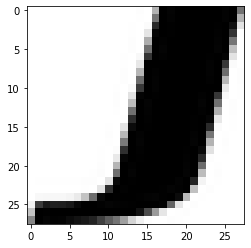

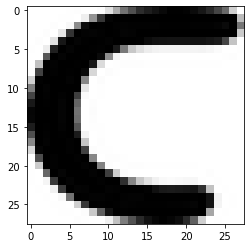

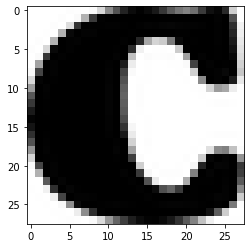

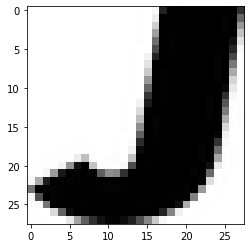

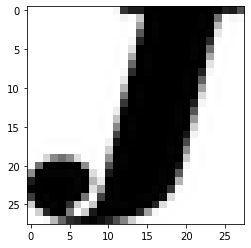

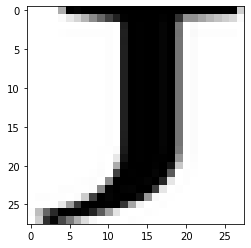

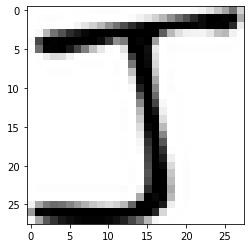

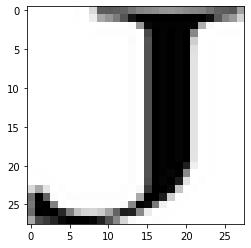

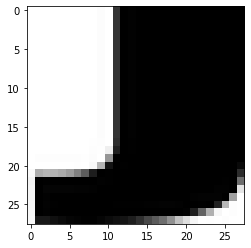

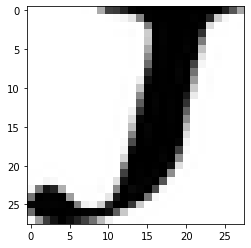

In [4]:
trainX, validX, testX, trainY, validY, testY = loadData()

for i in range(0,10): # Visualize the data
    plt.figure()
    plt.imshow(trainX[i], cmap='Greys')
    plt.show()

### Reshaping the MNIST data from (3500, 28, 28) to (3500, 28*28)

In [5]:
trainX.shape

(3500, 28, 28)

In [34]:
def transformData(data):
    image_pixels = 28 * 28
    X_train = np.reshape(data, (data.shape[0], image_pixels))
    return X_train

X_train = transformData(trainX)

In [7]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.00392157],
       ...,
       [0.        , 0.        , 0.        , ..., 0.99607843, 0.91372549,
        0.58431373],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01176471, 0.        ,
        0.        ]])

In [162]:
def accuracy(y_pred, y):
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    
    predDiff = abs(y_pred - y)
    correctPred = np.count_nonzero(predDiff == 0)
    return correctPred/len(y_pred)
    

In [160]:
y_pred_test = np.array([0.1, 0.5, 0.9])
y_actual_test = np.array([0, 0, 1])
accuracy(y_pred_test, y_actual_test)

[0. 0. 0.]


1.0

# MSE and gradient 

In [8]:
def MSE(W, b, x, y, reg):
   y_pred = np.add(x.dot(W), b) # x.W + b
   lse = np.subtract(y_pred, y) # y' - y
   lse_norm = (1/x.shape[0]) * np.linalg.norm(lse, ord = 2) ** 2 # 1/n * ||y'-y||

   reg_term = (reg/2) * (np.linalg.norm(w, ord = 2) ** 2) # REG/2 * ||W||^2
   regularized_mse = np.add(lse_norm, reg_term) # 1/n * ||y'-y|| + REG/2 * ||W||^2

   return regularized_mse

In [9]:
def gradMSE(W, b, x, y, reg):
    predDiff = (np.subtract(x.dot(W) + b, y)) # ((x.W+b) - y) 
    
    # gradient 
    term = 2 * (x.T).dot(predDiff) # 2* x'.predDiff
    reg_cost = (1/x.shape[0]) * (term) # 1/N * term1
    gradient_weight = np.add(reg_cost, reg*W) # 1/N * term1 + reg.W
   
    #bias
    bias = (1/x.shape[0]) * 2 * predDiff # 1/N * 2 * predDiff
   
    return gradient_weight, bias


In [163]:
def grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, lossType="MSE"):
    if lossType == "MSE":
        error_func = MSE
        grad_func = gradMSE
    else:
        error_func = crossEntropyLoss
        grad_func = gradCE
        
    y_pred = getPredictions(W, x, b)
    acc = accuracy(y_pred, y)
    error = error_func(W, b, x, y, reg)
    losses = [(0, acc, error)] # (epoch, error)
    for i in range(0, epochs):
        grad, bias = grad_func(W, b, x, y, reg)
        W = W - alpha * grad
        b = b - alpha * bias
        new_error = error_func(W, b, x, y, reg)
        y_pred = getPredictions(W, x, b)
        acc = accuracy(y_pred, y)
        if(abs(new_error - error) < error_tol):
            return W, b, losses
        error = new_error
        losses.append((i, acc, error))
        
    return W, b, losses

In [142]:
def getPredictions(W, x, b):
    y_pred = np.add(x.dot(W), b) # x.W + b
    
    return y_pred

In [143]:
# Test Case
w = np.zeros((784,1)) # 0 weight vector
biasTest = 0 # bias = 0

In [40]:
MSE(w, biasTest, X_train, trainY, 0)

0.502

In [103]:
gradWeight, bias = gradMSE(w, biasTest, X_train, trainY, 0)

In [42]:
gradWeight.shape # Should equal to shape of weight vector

(784, 1)

In [15]:
gradWeight

array([[-0.01667227],
       [-0.02131989],
       [-0.02707899],
       [-0.03771877],
       [-0.05315406],
       [-0.07194622],
       [-0.08983081],
       [-0.10632605],
       [-0.13318319],
       [-0.18955966],
       [-0.28129972],
       [-0.39635182],
       [-0.5100437 ],
       [-0.6056381 ],
       [-0.68064538],
       [-0.72849524],
       [-0.75167507],
       [-0.74384314],
       [-0.70666218],
       [-0.64265322],
       [-0.55652661],
       [-0.46885826],
       [-0.39259608],
       [-0.33028796],
       [-0.28095014],
       [-0.24252101],
       [-0.20853557],
       [-0.11786891],
       [-0.02452885],
       [-0.03647059],
       [-0.05215238],
       [-0.06884258],
       [-0.09225098],
       [-0.11778151],
       [-0.1518521 ],
       [-0.23992157],
       [-0.38428683],
       [-0.53369188],
       [-0.65210084],
       [-0.73366947],
       [-0.77774118],
       [-0.78774006],
       [-0.780493  ],
       [-0.76962017],
       [-0.76361681],
       [-0

In [16]:
bias.shape # bias for all prediction rows

(3500, 1)

In [17]:
bias

array([[ 0.        ],
       [-0.00057143],
       [-0.00057143],
       ...,
       [ 0.        ],
       [-0.00057143],
       [ 0.        ]])

In [166]:
alphaTest = 0.005
epochTest = 5000
reg = 1
error_total = 1e-7

tunedW, tunedBias, lossLists = grad_descent(w, biasTest, X_train, trainY, alphaTest, 5000, reg, error_total)

In [167]:
lossLists

[(0, 0.498, 0.502),
 (0, 0.7408571428571429, 0.18030088188474),
 (1, 0.8774285714285714, 0.10480164098569908),
 (2, 0.9165714285714286, 0.0796187722460012),
 (3, 0.9211428571428572, 0.0695991614186518),
 (4, 0.9274285714285714, 0.064707386000672),
 (5, 0.9297142857142857, 0.06206250429666746),
 (6, 0.9317142857142857, 0.060378562047407595),
 (7, 0.9322857142857143, 0.059186417491563115),
 (8, 0.9334285714285714, 0.05825325931095191),
 (9, 0.934, 0.057480157340044136),
 (10, 0.9345714285714286, 0.05681339053184686),
 (11, 0.9348571428571428, 0.05622479659502475),
 (12, 0.9351428571428572, 0.05569663704666854),
 (13, 0.9362857142857143, 0.05521734650261865),
 (14, 0.9371428571428572, 0.054778579033905525),
 (15, 0.9377142857142857, 0.054374099421465955),
 (16, 0.9377142857142857, 0.05399903973573051),
 (17, 0.9377142857142857, 0.05364951868962314),
 (18, 0.938, 0.053322378527028966),
 (19, 0.9388571428571428, 0.05301501586370298),
 (20, 0.9388571428571428, 0.052725258691452566),
 (21, 0.

In [19]:
tunedW.shape

(784, 1)

In [20]:
tunedW

array([[-1.09876982e-03],
       [-1.66188508e-03],
       [-2.48143107e-03],
       [-2.40492342e-03],
       [-2.36707911e-03],
       [-2.55797204e-03],
       [-2.90858694e-03],
       [-3.15649893e-03],
       [-2.30581039e-03],
       [-1.21682986e-03],
       [ 3.95430750e-04],
       [ 2.14414368e-03],
       [ 2.45615134e-03],
       [ 3.12684780e-03],
       [ 5.04463496e-03],
       [ 5.79354732e-03],
       [ 8.15048327e-03],
       [ 8.10046111e-03],
       [ 7.38708328e-03],
       [ 7.31019335e-03],
       [ 6.03389109e-03],
       [ 4.89391439e-03],
       [ 3.25061208e-03],
       [ 1.18234184e-03],
       [-1.53278893e-03],
       [-5.82714034e-03],
       [-8.75763175e-03],
       [-7.38692806e-03],
       [-1.46416328e-03],
       [-1.95300205e-03],
       [-1.70732511e-03],
       [-1.70370350e-03],
       [-1.89210293e-03],
       [-2.31928742e-03],
       [-1.68493952e-03],
       [-9.24689657e-05],
       [ 1.22952796e-03],
       [ 1.01460155e-03],
       [-2.6

## Graph the loss

In [188]:
def graphLoss(w, b, x, y, alpha, epochs, reg, error_tot):
    plt.figure(figsize=(8, 6))
    for a in alpha:
        wi, bi, loss_list = grad_descent(w, b, x, y, a, epochs, reg, error_tot)
        x_val = [x[0] for x in loss_list]
        y_acc = [yAcc[1] for yAcc in loss_list]
        y_val = [x[2] for x in loss_list]
        print(loss_list[-1])
        plt.plot(x_val,y_val, label=a)
        plt.plot(x_val,y_acc, label=str(a) + " Acc")

    plt.xlim(0,5000)
    plt.ylim(0, 1)
    plt.legend(loc='upper right')        
    plt.title('Impact of alpha')
    plt.xlabel('Epoch')
    plt.ylabel('Losses')
    plt.show()


(4999, 0.9688571428571429, 0.031130036956855255)
(4999, 0.9605714285714285, 0.03617802588972038)
(4999, 0.952, 0.043528201638583446)


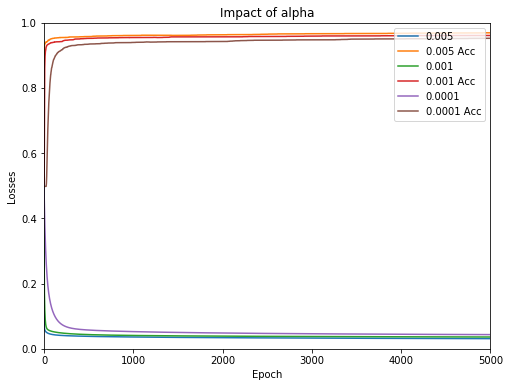

In [190]:
alp = [0.005, 0.001, 0.0001]
graphLoss(w, 0, X_train, trainY, alp, 5000, 0, error_total)

In [191]:
X_valid = transformData(validX)
X_valid.shape

(100, 784)

(3087, 1.0, 8.582555934186253e-05)
(4999, 1.0, 0.0015591371293167749)
(4999, 0.98, 0.02359306953612091)


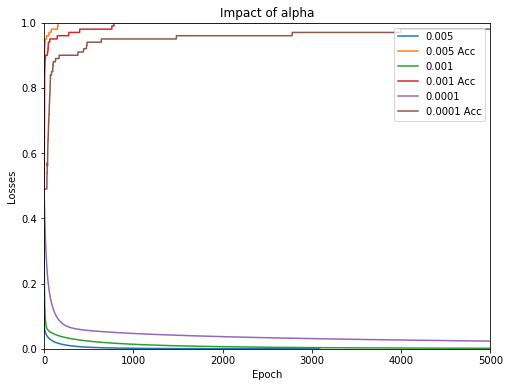

In [192]:
graphLoss(w, 0, X_valid, validY, alp, 5000, 0, error_total) # Validation Set

(4999, 1.0, 0.00021344214773476845)
(4999, 1.0, 0.0033196617369893083)
(4999, 0.9724137931034482, 0.023621176450839002)


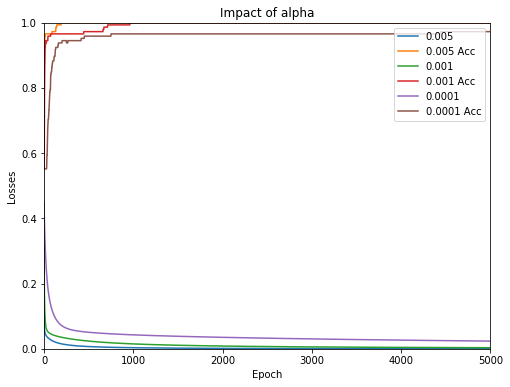

In [193]:
X_test = transformData(testX)
X_test.shape
graphLoss(w, 0, X_test, testY, alp, 5000, 0, error_total) # Test Set

# 4. Reg

In [194]:
def graphRegLoss(w, b, x, y, alpha, epochs, reg, error_tot):
    plt.figure(figsize=(8, 6))
    for a in reg:
        wi, bi, loss_list = grad_descent(w, b, x, y, alpha, epochs, a, error_tot)
        x_val = [x[0] for x in loss_list]
        y_acc = [yAcc[1] for yAcc in loss_list]
        y_val = [x[2] for x in loss_list]
        print(loss_list[-1])
        plt.plot(x_val,y_val, label=a)
        plt.plot(x_val,y_acc, label=str(a) + " Acc")

    plt.xlim(0,5000)
    plt.legend(loc='upper right')        
    plt.title('Impact of alpha')
    plt.xlabel('Epoch')
    plt.ylabel('Losses')
    plt.show()


(4999, 0.9685714285714285, 0.03116950108165321)
(4999, 0.9634285714285714, 0.034377247299385044)
(4999, 0.956, 0.03884961952283908)


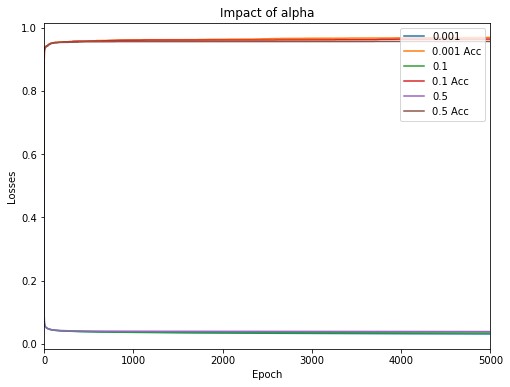

In [195]:
regs = [0.001, 0.1, 0.5]
graphRegLoss(w, 0, X_train, trainY, 0.005, 5000, regs, error_total) # Train Set

(3103, 1.0, 8.898968938552139e-05)
(4088, 1.0, 0.001312276657214353)
(4999, 1.0, 0.00622226007690518)


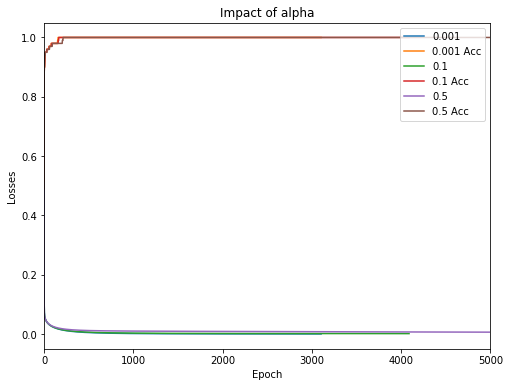

In [196]:
graphRegLoss(w, 0, X_valid, validY, 0.005, 5000, regs, error_total) # Valid Set

(4999, 1.0, 0.00022356383063103314)
(4999, 1.0, 0.002138570834653013)
(4999, 1.0, 0.007871468141746796)


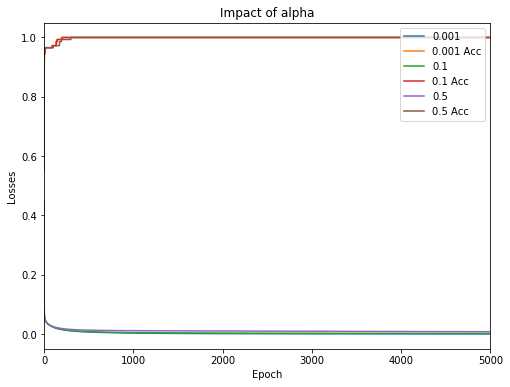

In [197]:
graphRegLoss(w, 0, X_test, testY, 0.005, 5000, regs, error_total) # Test Set

In [53]:
# 5. Compare with normal equation:
def normalEquation(x, y):
    termA = np.linalg.inv(x.T.dot(x))
    termB = x.T.dot(y)
    
    return termA.dot(termB)

In [69]:
weightNE = normalEquation(X_train, trainY)
weightNE

array([[-1.29912685e-01],
       [ 2.05268292e-01],
       [-2.67309395e-01],
       [ 1.36072110e-01],
       [-9.19108242e-02],
       [ 7.68732403e-02],
       [ 5.67691672e-02],
       [-1.27258037e-01],
       [ 7.17273276e-02],
       [-2.19258751e-02],
       [-6.82247169e-02],
       [-2.86225672e-03],
       [ 1.23390274e-01],
       [-1.88950877e-01],
       [ 1.26825759e-01],
       [-9.82556569e-02],
       [ 1.35406964e-01],
       [-1.73983404e-02],
       [ 3.28667305e-03],
       [-2.91803702e-03],
       [ 2.75572359e-02],
       [-1.69797799e-02],
       [ 3.33037511e-02],
       [-1.07848858e-02],
       [ 5.67552883e-02],
       [-4.25995973e-02],
       [-6.09425878e-02],
       [ 1.08365611e-02],
       [ 7.65768923e-02],
       [-1.42809497e-01],
       [ 2.19287953e-01],
       [-2.74345615e-01],
       [ 2.46858935e-01],
       [-2.69697079e-01],
       [ 5.86174181e-02],
       [-2.03911750e-02],
       [-8.75353573e-03],
       [-2.89017938e-02],
       [ 1.3

In [70]:
mseNE = MSE(weightNE, biasTest, X_train, trainY, 0)
mseNE

0.02316403185477394

In [76]:
weightBatch, batchBias, losses = grad_descent(w, 0, X_train, trainY, 0.005, 5000, 0, error_total) 
MSE(weightBatch, biasTest, X_train, trainY, 0)

0.03205537844578653

In [81]:
print("MSE NE comp:" + str(MSE(weightNE, biasTest, X_test, testY, 0)))
print("MSE GD comp:" + str(MSE(weightBatch, biasTest, X_test, testY, 0)))

Accuracy NE comp:0.06680315449484156
Accuracy GD comp:0.04406605174140584


In [198]:
yPredNE = getPredictions(weightNE, X_train, 0)
yPredBGD = getPredictions(weightBatch, X_train, batchBias)
print("Acc NE comp:" + str(accuracy(yPredNE, trainY)))
print("Acc GD comp:" + str(accuracy(yPredBGD, trainY)))

Acc NE comp:0.9842857142857143
Acc GD comp:0.9688571428571429


# Logistic Regression

In [82]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [85]:
sigmoid(X_train.dot(w) + biasTest).shape

(3500, 1)

In [127]:
def crossEntropyLoss(W, b, x, y, reg):    
    termA = -1 * ((np.log(sigmoid(x.dot(W) + b))).T).dot(y) # (log(sigmoid(x.W+b)))' * y
    termB = -1 * ((np.log(1 - sigmoid(x.dot(W) + b))).T).dot(1-y) # (log(1 - sigmoid(x.W+b)))' * (1 - y)
    
    reg_term = (reg/2) * (np.linalg.norm(W, ord = 2) ** 2) # reg/2 * ||W|| ^ 2
    
    return (1/(x.shape[0])) * ((termA + termB)[0][0]) + reg_term

In [128]:
crossEntropyLoss(w, 0, X_train, trainY, 0.11)

0.6931471805599458

In [116]:
def gradCE(W, b, x, y, reg):
    termA = -1 * y # -y
    termB = sigmoid(x.dot(W) + b) #sigmoid(x.W + b)
    
    reg_term = reg*W 
    crossEntropyLoss = (1/x.shape[0])*((x.T).dot(termA + termB))
    
    grad = np.add(crossEntropyLoss, reg_term)
    bias = (1/x.shape[0]) * (termA+termB)
        
    return grad, bias

In [95]:
gradientCE, biasCE = gradientC(w, 0, X_train, trainY, 0.11)

In [96]:
gradientCE

array([[-1.63249300e-03],
       [-5.88235294e-04],
       [ 4.64425770e-04],
       [ 5.89915966e-04],
       [ 9.59103641e-04],
       [ 1.43025210e-03],
       [ 1.52212885e-03],
       [ 5.02577031e-03],
       [ 6.91820728e-03],
       [ 1.62296919e-03],
       [-1.16364146e-02],
       [-2.87557423e-02],
       [-4.52582633e-02],
       [-5.62963585e-02],
       [-6.31350140e-02],
       [-6.24767507e-02],
       [-5.76633053e-02],
       [-4.35294118e-02],
       [-2.29731092e-02],
       [ 3.30588235e-03],
       [ 3.48487395e-02],
       [ 6.54582633e-02],
       [ 9.18924370e-02],
       [ 1.12543417e-01],
       [ 1.26388235e-01],
       [ 1.35216246e-01],
       [ 1.37407843e-01],
       [ 1.06010084e-01],
       [-3.13165266e-03],
       [-3.61176471e-03],
       [-5.69131653e-03],
       [-7.69747899e-03],
       [-9.81232493e-03],
       [-1.18711485e-02],
       [-1.65478992e-02],
       [-3.29098039e-02],
       [-6.24593838e-02],
       [-9.35406162e-02],
       [-1.1

In [97]:
biasCE

array([[ 0.00014286],
       [-0.00014286],
       [-0.00014286],
       ...,
       [ 0.00014286],
       [-0.00014286],
       [ 0.00014286]])

In [98]:
# def grad_descentCE(W, b, x, y, alpha, epochs, reg, error_tol):
#     error = crossEntropyLoss(W, b, x, y, reg)
#     losses = [(0,error)]
#     for i in range(0, epochs):
#         grad, bias = gradientC(W, b, x, y, reg)
#         W = W - alpha * grad
#         b = b - alpha * bias
#         new_error = crossEntropyLoss(W, b, x, y, reg)
#         print("new_error:" + str(new_error))
#         if(abs(new_error - error) < error_tol):
#             return W, b
#         error = new_error
#         losses.append((i,error))
        
#     return W, b, losses

In [117]:
f,g,h = grad_descent(w, 0, X_train, trainY, 0.005, 5000, 0.1, error_total, "CE")

[[0.65865657]]
[[0.62723684]]
[[0.59857938]]
[[0.57240406]]
[[0.54845796]]
[[0.52651372]]
[[0.50636757]]
[[0.48783736]]
[[0.47076061]]
[[0.45499252]]
[[0.44040424]]
[[0.42688109]]
[[0.41432104]]
[[0.40263331]]
[[0.39173702]]
[[0.38156009]]
[[0.37203822]]
[[0.36311394]]
[[0.35473584]]
[[0.34685784]]
[[0.33943861]]
[[0.33244098]]
[[0.32583147]]
[[0.31957991]]
[[0.31365899]]
[[0.30804403]]
[[0.30271263]]
[[0.29764445]]
[[0.29282099]]
[[0.28822537]]
[[0.28384219]]
[[0.27965738]]
[[0.27565803]]
[[0.27183231]]
[[0.26816935]]
[[0.26465917]]
[[0.26129253]]
[[0.25806095]]
[[0.25495656]]
[[0.2519721]]
[[0.24910084]]
[[0.24633652]]
[[0.24367336]]
[[0.24110596]]
[[0.23862929]]
[[0.23623868]]
[[0.23392975]]
[[0.23169844]]
[[0.22954092]]
[[0.22745362]]
[[0.22543321]]
[[0.22347654]]
[[0.22158066]]
[[0.21974282]]
[[0.2179604]]
[[0.21623095]]
[[0.21455217]]
[[0.21292188]]
[[0.21133802]]
[[0.20979865]]
[[0.20830195]]
[[0.20684617]]
[[0.20542967]]
[[0.2040509]]
[[0.20270838]]
[[0.20140071]]
[[0.20012657]

[[0.11946167]]
[[0.11944685]]
[[0.11943209]]
[[0.11941739]]
[[0.11940276]]
[[0.1193882]]
[[0.1193737]]
[[0.11935927]]
[[0.1193449]]
[[0.11933059]]
[[0.11931635]]
[[0.11930217]]
[[0.11928805]]
[[0.119274]]
[[0.11926001]]
[[0.11924608]]
[[0.11923221]]
[[0.1192184]]
[[0.11920465]]
[[0.11919096]]
[[0.11917733]]
[[0.11916377]]
[[0.11915026]]
[[0.11913681]]
[[0.11912341]]
[[0.11911008]]
[[0.11909681]]
[[0.11908359]]
[[0.11907043]]
[[0.11905732]]
[[0.11904427]]
[[0.11903128]]
[[0.11901835]]
[[0.11900547]]
[[0.11899264]]
[[0.11897987]]
[[0.11896716]]
[[0.11895449]]
[[0.11894189]]
[[0.11892933]]
[[0.11891683]]
[[0.11890439]]
[[0.11889199]]
[[0.11887965]]
[[0.11886736]]
[[0.11885513]]
[[0.11884294]]
[[0.11883081]]
[[0.11881872]]
[[0.11880669]]
[[0.11879471]]
[[0.11878278]]
[[0.1187709]]
[[0.11875906]]
[[0.11874728]]
[[0.11873555]]
[[0.11872386]]
[[0.11871223]]
[[0.11870064]]
[[0.1186891]]
[[0.11867761]]
[[0.11866617]]
[[0.11865477]]
[[0.11864342]]
[[0.11863212]]
[[0.11862086]]
[[0.11860965]]
[[0

[[0.11597691]]
[[0.11597455]]
[[0.11597219]]
[[0.11596984]]
[[0.1159675]]
[[0.11596515]]
[[0.11596282]]
[[0.11596049]]
[[0.11595817]]
[[0.11595585]]
[[0.11595354]]
[[0.11595123]]
[[0.11594893]]
[[0.11594663]]
[[0.11594434]]
[[0.11594205]]
[[0.11593977]]
[[0.1159375]]
[[0.11593523]]
[[0.11593297]]
[[0.11593071]]
[[0.11592846]]
[[0.11592621]]
[[0.11592397]]
[[0.11592173]]
[[0.1159195]]
[[0.11591727]]
[[0.11591505]]
[[0.11591284]]
[[0.11591063]]
[[0.11590842]]
[[0.11590622]]
[[0.11590402]]
[[0.11590183]]
[[0.11589965]]
[[0.11589747]]
[[0.1158953]]
[[0.11589313]]
[[0.11589096]]
[[0.1158888]]
[[0.11588665]]
[[0.1158845]]
[[0.11588236]]
[[0.11588022]]
[[0.11587808]]
[[0.11587595]]
[[0.11587383]]
[[0.11587171]]
[[0.11586959]]
[[0.11586748]]
[[0.11586538]]
[[0.11586328]]
[[0.11586119]]
[[0.1158591]]
[[0.11585701]]
[[0.11585493]]
[[0.11585285]]
[[0.11585078]]
[[0.11584872]]
[[0.11584666]]
[[0.1158446]]
[[0.11584255]]
[[0.1158405]]
[[0.11583846]]
[[0.11583642]]
[[0.11583439]]
[[0.11583236]]
[[0.

[[0.11520341]]
[[0.11520264]]
[[0.11520188]]
[[0.11520111]]
[[0.11520034]]
[[0.11519958]]
[[0.11519882]]
[[0.11519805]]
[[0.11519729]]
[[0.11519653]]
[[0.11519578]]
[[0.11519502]]
[[0.11519426]]
[[0.11519351]]
[[0.11519276]]
[[0.11519201]]
[[0.11519125]]
[[0.11519051]]
[[0.11518976]]
[[0.11518901]]
[[0.11518827]]
[[0.11518752]]
[[0.11518678]]
[[0.11518604]]
[[0.1151853]]
[[0.11518456]]
[[0.11518382]]
[[0.11518308]]
[[0.11518235]]
[[0.11518162]]
[[0.11518088]]
[[0.11518015]]
[[0.11517942]]
[[0.11517869]]
[[0.11517796]]
[[0.11517724]]
[[0.11517651]]
[[0.11517579]]
[[0.11517506]]
[[0.11517434]]
[[0.11517362]]
[[0.1151729]]
[[0.11517218]]
[[0.11517147]]
[[0.11517075]]
[[0.11517004]]
[[0.11516932]]
[[0.11516861]]
[[0.1151679]]
[[0.11516719]]
[[0.11516648]]
[[0.11516577]]
[[0.11516507]]
[[0.11516436]]
[[0.11516366]]
[[0.11516296]]
[[0.11516225]]
[[0.11516155]]
[[0.11516085]]
[[0.11516016]]
[[0.11515946]]
[[0.11515876]]
[[0.11515807]]
[[0.11515738]]
[[0.11515668]]
[[0.11515599]]
[[0.1151553]]

[[0.11492115]]
[[0.11492082]]
[[0.11492049]]
[[0.11492016]]
[[0.11491984]]
[[0.11491951]]
[[0.11491918]]
[[0.11491886]]
[[0.11491853]]
[[0.1149182]]
[[0.11491788]]
[[0.11491755]]
[[0.11491723]]
[[0.11491691]]
[[0.11491658]]
[[0.11491626]]
[[0.11491594]]
[[0.11491562]]
[[0.1149153]]
[[0.11491497]]
[[0.11491465]]
[[0.11491433]]
[[0.11491401]]
[[0.11491369]]
[[0.11491338]]
[[0.11491306]]
[[0.11491274]]
[[0.11491242]]
[[0.11491211]]
[[0.11491179]]
[[0.11491147]]
[[0.11491116]]
[[0.11491084]]
[[0.11491053]]
[[0.11491021]]
[[0.1149099]]
[[0.11490959]]
[[0.11490927]]
[[0.11490896]]
[[0.11490865]]
[[0.11490834]]
[[0.11490803]]
[[0.11490771]]
[[0.1149074]]
[[0.11490709]]
[[0.11490679]]
[[0.11490648]]
[[0.11490617]]
[[0.11490586]]
[[0.11490555]]
[[0.11490524]]
[[0.11490494]]
[[0.11490463]]
[[0.11490432]]
[[0.11490402]]
[[0.11490371]]
[[0.11490341]]
[[0.1149031]]
[[0.1149028]]
[[0.1149025]]
[[0.11490219]]
[[0.11490189]]
[[0.11490159]]
[[0.11490129]]
[[0.11490099]]
[[0.11490068]]
[[0.11490038]]
[[

[[0.11479129]]
[[0.11479113]]
[[0.11479097]]
[[0.11479081]]
[[0.11479065]]
[[0.11479049]]
[[0.11479034]]
[[0.11479018]]
[[0.11479002]]
[[0.11478986]]
[[0.11478971]]
[[0.11478955]]
[[0.11478939]]
[[0.11478924]]
[[0.11478908]]
[[0.11478892]]
[[0.11478877]]
[[0.11478861]]
[[0.11478846]]
[[0.1147883]]
[[0.11478815]]
[[0.11478799]]
[[0.11478784]]
[[0.11478768]]
[[0.11478753]]
[[0.11478737]]
[[0.11478722]]
[[0.11478706]]
[[0.11478691]]
[[0.11478676]]
[[0.1147866]]
[[0.11478645]]
[[0.1147863]]
[[0.11478615]]
[[0.11478599]]
[[0.11478584]]
[[0.11478569]]
[[0.11478554]]
[[0.11478538]]
[[0.11478523]]
[[0.11478508]]
[[0.11478493]]
[[0.11478478]]
[[0.11478463]]
[[0.11478448]]
[[0.11478432]]
[[0.11478417]]
[[0.11478402]]
[[0.11478387]]
[[0.11478372]]
[[0.11478357]]
[[0.11478342]]
[[0.11478327]]
[[0.11478313]]
[[0.11478298]]
[[0.11478283]]
[[0.11478268]]
[[0.11478253]]
[[0.11478238]]
[[0.11478223]]
[[0.11478209]]
[[0.11478194]]
[[0.11478179]]
[[0.11478164]]
[[0.11478149]]
[[0.11478135]]
[[0.1147812]]

In [199]:
def graphLossAcc(w, b, x, y, alpha, epochs, reg, error_tot, typeLoss = "CE"):
    for a in alpha:
        wi, bi, loss_list = grad_descent(w, b, x, y, a, epochs, reg, error_tot, typeLoss)
        x_val = [x[0] for x in loss_list]
        y_acc = [yAcc[1] for yAcc in loss_list]
        y_val = [x[2] for x in loss_list]
        print(loss_list[-1])
        plt.plot(x_val,y_val, label=a)
        plt.plot(x_val,y_acc, label=str(a) + " Acc")

    plt.xlim(0,5000)
    plt.legend(loc='upper right')        
    plt.title('Impact of alpha')
    plt.xlabel('Epoch')
    plt.ylabel('Losses')
    plt.show()


(3223, 0.9762857142857143, 0.11473832256938038)
(4999, 0.9728571428571429, 0.11634642667936826)
(4999, 0.958, 0.17158156020855547)


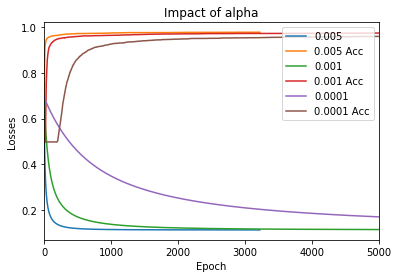

In [200]:
graphLossAcc(w, 0, X_train, trainY, [0.005, 0.001, 0.0001], 5000, 0.1, error_total) # Train Set

(4999, 1.0, 0.094591719483644)
(4999, 0.99, 0.09904175879033322)
(4999, 0.97, 0.17686763052308785)


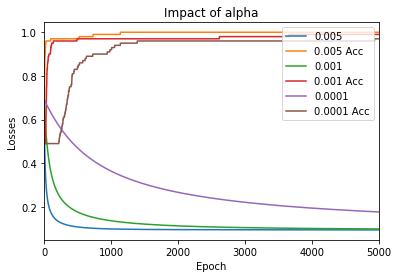

In [201]:
graphLossAcc(w, 0, X_valid, validY, [0.005, 0.001, 0.0001], 5000, 0.1, error_total) # Validation Set

(4999, 1.0, 0.08640774490756328)
(4999, 0.9862068965517241, 0.08999033281190713)
(4999, 0.9655172413793104, 0.15991630134858675)


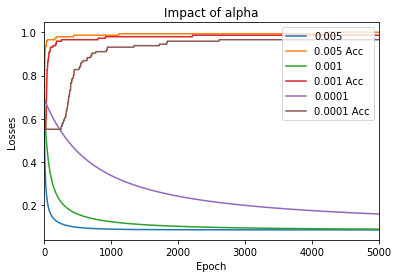

In [202]:
graphLossAcc(w, 0, X_test, testY, [0.005, 0.001, 0.0001], 5000, 0.1, error_total) # Test Set

# 3. Compare Logistic Reg vs. Lin Reg

In [131]:
def graph(W, b, x, y, alpha, epochs, reg, error_tot):
    for loss in ["MSE", "CE"]:
        wi, bi, loss_list = grad_descent(W, b, x, y, alpha, epochs, reg, error_tot, loss)
        x_val = [x[0] for x in loss_list]
        y_val = [x[1] for x in loss_list]
        print("loss type:" + loss + "; final loss: " + str(loss_list[-1][1]))
        plt.plot(x_val,y_val, label=loss)

    plt.xlim(0,5000)
    plt.legend(loc='upper right')        
    plt.title('Impact of alpha')
    plt.xlabel('Epoch')
    plt.ylabel('Losses')
    plt.show()
    

loss type:MSE; final loss: 0.031130036956855255
loss type:CE; final loss: 0.054354614423287075


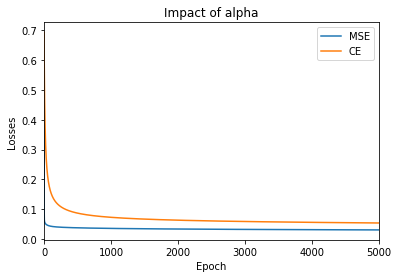

In [132]:
graph(w, 0, X_train, trainY, 0.005, 5000, 0, error_total)